# Mendefinisikan Pertanyaan
Pada project kali ini, dataset yang digunakan adalah dataset tentang program *bike-sharing* di kota Washington D.C., USA. Program *bike-sharing* merupakan program yang yang memungkinkan pengguna untuk meminjam dan mengembalikan sepeda ke berbagai posisi.

Pada project ini pertanyaan SMART yang akan dijawab pada EDA adalah:


1.   Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda di antara pengguna kasual dan terdaftar?
2.   Apakah terdapat perbedaan tingkat penyewaan sepeda pada hari kerja dan hari libur?
3.   Jam berapa penyewaan sepeda paling tinggi?
4.   Bagaimana pengaruh temperatur terhadap total penyewaan sepeda?



#Data Wrangling
Pada tahap ini data akan dikumpulkan dan dibersihkan untuk dinilai kualitas dan struktur data guna menjawab pertanyaan bisnis.

##Gathering Data

In [1]:
#Mengimport library yang dibutuhkan
import gdown
import pandas
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print(gdown.__version__)
print(pandas.__version__)
print(matplotlib.__version__)
print(sns.__version__)

5.2.0
2.1.4
3.7.1
0.13.1


In [2]:
#Membaca dataframe day.csv
file_id = "1j5y3UHZUC9TKMu3wsulL6vaAasYytS7a"
url = f'https://drive.google.com/uc?id={file_id}'
output = 'day.csv'
gdown.download(url, output, quiet=False)

day_df = pandas.read_csv('day.csv')
day_df.head()

Downloading...
From: https://drive.google.com/uc?id=1j5y3UHZUC9TKMu3wsulL6vaAasYytS7a
To: /content/day.csv
100%|██████████| 57.6k/57.6k [00:00<00:00, 48.1MB/s]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Membaca dataframe hour.csv
file_id1 = "1fMy2FB0tFqpFer0OPoT6mIGZkGMh_JHL"
url = f'https://drive.google.com/uc?id={file_id1}'
output2 = 'hour.csv'
gdown.download(url, output2, quiet=False)

hour_df = pandas.read_csv('hour.csv')
hour_df.head()

Downloading...
From: https://drive.google.com/uc?id=1fMy2FB0tFqpFer0OPoT6mIGZkGMh_JHL
To: /content/hour.csv
100%|██████████| 1.16M/1.16M [00:00<00:00, 29.3MB/s]


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##Assesing Data

In [4]:
#Memeriksa missing value dari day.csv
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [5]:
#Memeriksa missing value dari hour.csv
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [6]:
#Mengecek nilai secara keseluruhan dari day.csv
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Pada tampilan di atas, nilai-nilai dari tiap kolom sudah sesuai dengan yang seharusnya.

In [7]:
#Mengecek nilai secara keseluruhan dari hour.csv
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Pada tampilan di atas, nilai-nilai dari tiap kolom sudah sesuai dengan yang seharusnya.

In [8]:
#Mengecek kesamaan total sepeda yang disewakan dari day.csv
if (day_df['cnt'] != day_df['casual'] + day_df['registered']).any():
  print('Data tidak sesuai')

In [9]:
#Mengecek kesamaan total sepeda yang disewakan dari hour.csv
if (hour_df['cnt'] != hour_df['casual'] + hour_df['registered']).any():
  print('Data tidak sesuai')

In [10]:
#Memeriksa duplicate data pada day.csv
day_df.duplicated().sum()

0

In [11]:
#Memeriksa duplicate data pada hour.csv
hour_df.duplicated().sum()

0

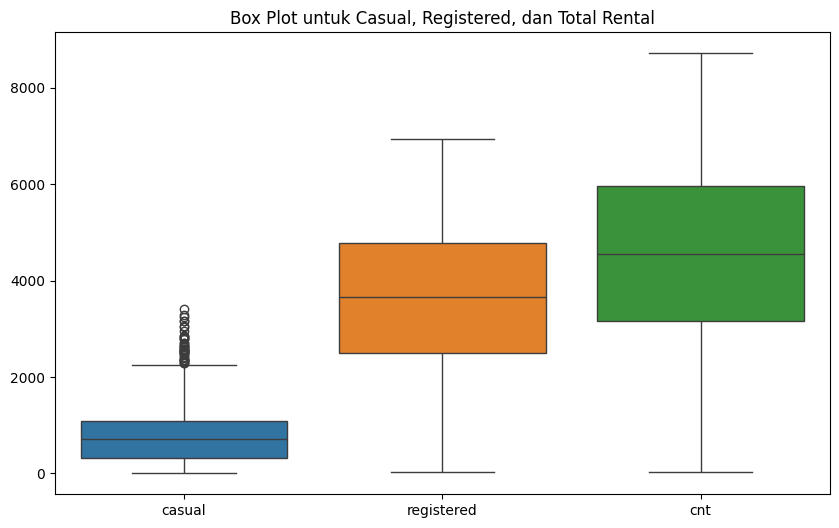

In [12]:
#Memeriksa outlier pada day.csv
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df[['casual', 'registered', 'cnt']])
plt.title('Box Plot untuk Casual, Registered, dan Total Rental')
plt.show()

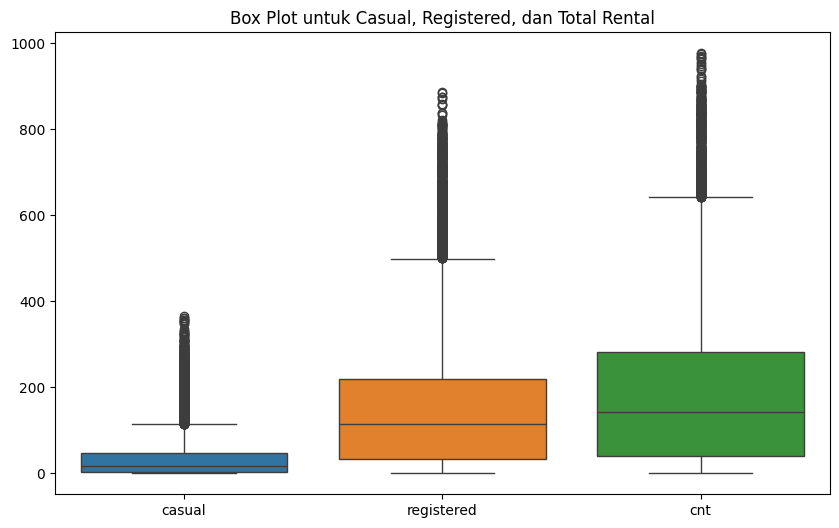

In [13]:
#Memeriksa outlier pada day.csv
plt.figure(figsize=(10, 6))
sns.boxplot(data=hour_df[['casual', 'registered', 'cnt']])
plt.title('Box Plot untuk Casual, Registered, dan Total Rental')
plt.show()

##Cleaning Data
Pada day.csv dan hour.csv tidak ditemukan *missing value*, *duplicate data*, dan juga *invalid value*. Selanjutnya outlier yang ditemukan akan dianalisis.

In [14]:
#Mengecek outlier pada day.csv terjadi pada hari apa
Q1 = day_df['casual'].quantile(0.25)
Q3 = day_df['casual'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = day_df[(day_df['casual'] < lower_bound) | (day_df['casual'] > upper_bound)]

if outliers.empty:
  print("Tidak ada outlier ditemukan.")
else:
  outliers_holiday = outliers[['dteday', 'casual', 'holiday', 'weekday', 'workingday']]
  print(outliers_holiday)

         dteday  casual  holiday  weekday  workingday
148  2011-05-29    2355        0        0           0
183  2011-07-03    2282        0        0           0
184  2011-07-04    3065        1        1           0
196  2011-07-16    2418        0        6           0
246  2011-09-04    2521        0        0           0
281  2011-10-09    2397        0        0           0
441  2012-03-17    3155        0        6           0
447  2012-03-23    2469        0        5           1
455  2012-03-31    2301        0        6           0
456  2012-04-01    2347        0        0           0
462  2012-04-07    3252        0        6           0
469  2012-04-14    2795        0        6           0
470  2012-04-15    2846        0        0           0
476  2012-04-21    2541        0        6           0
490  2012-05-05    2496        0        6           0
497  2012-05-12    2622        0        6           0
504  2012-05-19    3410        0        6           0
505  2012-05-20    2704     

Pada hasil diatas, terlihat bahwa semua outliers yang ada terjadi pada holiday/weekend. Pada index 447, outlier terjadi pada hari jum'at. Maka dari itu nilai dari outliers akan dibiarkan.

Dikarenakan data pada day.csv berkolerasi dengan hour.csv maka outlier yang ada pada hour.csv juga dibiarkan.

#Exploratory Data Analysis (EDA)
Pada tahap ini akan dipaparkan EDA guna menjawab pertanyaan bisnis yang sudah ditetapkan

##Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda di antara pengguna *casual* dan *registered*?

In [15]:
day_df[['casual', 'registered', 'cnt']].describe()

,casual,registered,cnt
count,731.000000,731.000000,731.000000
mean,848.176471,3656.172367,4504.348837
std,686.622488,1560.256377,1937.211452
min,2.000000,20.000000,22.000000
25%,315.500000,2497.000000,3152.000000
50%,713.000000,3662.000000,4548.000000
75%,1096.000000,4776.500000,5956.000000
max,3410.000000,6946.000000,8714.000000


Dari tabel diatas, dapat diketahui rata-rata (mean), minimal, dan maksimal dari masing-masing kategori.

In [16]:
#Membuat tabel pivot untuk melihat perbedaan sepeda disewa berdasarkan musim
sewa_permusim = day_df.groupby('season').agg({
  'casual': 'sum',
  'registered': 'sum',
  'cnt': 'sum'
}).reset_index()
print(sewa_permusim)

   season  casual  registered      cnt
0       1   60622      410726   471348
1       2  203522      715067   918589
2       3  226091      835038  1061129
3       4  129782      711831   841613


Pada tabel di atas, terlihat bahwa kategori 'casual' dan 'registered' keduanya paling banyak disewa pada musim gugur (3) dan paling sedikit disewa pada musim semi (1).

In [17]:
day_df[['casual', 'registered', 'cnt', 'season']].corr()

,casual,registered,cnt,season
casual,1.000000,0.395282,0.672804,0.210399
registered,0.395282,1.000000,0.945517,0.411623
cnt,0.672804,0.945517,1.000000,0.406100
season,0.210399,0.411623,0.406100,1.000000


Pada tabel di atas, terlihat bahwa tidak ada korelasi yang kuat (corr < 0.5) antara tiap kategori dengan musim.

##Apakah terdapat perbedaan tingkat penyewaan sepeda pada hari kerja dan hari libur?

In [18]:
#Membuat tabel pivot untuk melihat perbedaan sepeda disewa berdasarkan hari

casual_workingday = day_df.groupby('workingday').agg({
  'casual': 'mean',
}).reset_index()
print(casual_workingday)
print("")

registered_workingday = day_df.groupby('workingday').agg({
  'registered': 'mean',
}).reset_index()
print(registered_workingday)
print("")

total_workingday = day_df.groupby('workingday').agg({
  'cnt': 'mean',
}).reset_index()
print(total_workingday)

   workingday       casual
0           0  1371.134199
1           1   606.570000

   workingday   registered
0           0  2959.034632
1           1  3978.250000

   workingday          cnt
0           0  4330.168831
1           1  4584.820000


Dari ketiga tabel diatas dapat terlihat bahwa penyewaan sepeda kasual memiliki rata-rata penyewaan lebih banyak pada hari libur, sedangkan sepeda terdaftar (registered) memiliki rata-rata penyewaan lebih banyak pada hari kerja. Namun jika dilihat dari total penyewaan perharinya, maka hari kerja memiliki lebih banyak penyewa.

##Jam berapa penyewaan sepeda paling tinggi?

In [19]:
hour_df[['hr', 'casual', 'registered', 'cnt']].describe()

,hr,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,35.676218,153.786869,189.463088
std,6.914405,49.305030,151.357286,181.387599
min,0.000000,0.000000,0.000000,1.000000
25%,6.000000,4.000000,34.000000,40.000000
50%,12.000000,17.000000,115.000000,142.000000
75%,18.000000,48.000000,220.000000,281.000000
max,23.000000,367.000000,886.000000,977.000000


Dari tabel diatas, dapat diketahui rata-rata (mean), minimal, dan maksimal dari masing-masing kategori.

In [20]:
bike_perhour = hour_df.groupby('hr').agg({
  'casual': 'mean',
  'registered': 'mean',
  'cnt': 'mean'
}).reset_index()

print(bike_perhour)

    hr     casual  registered         cnt
0    0  10.158402   43.739669   53.898072
1    1   6.504144   26.871547   33.375691
2    2   4.772028   18.097902   22.869930
3    3   2.715925    9.011478   11.727403
4    4   1.253945    5.098996    6.352941
5    5   1.411437   18.478382   19.889819
6    6   4.161379   71.882759   76.044138
7    7  11.055021  201.009629  212.064649
8    8  21.679505  337.331499  359.011004
9    9  30.891334  188.418157  219.309491
10  10  46.477304  127.191197  173.668501
11  11  59.540578  148.602476  208.143054
12  12  68.293956  185.021978  253.315934
13  13  72.308642  181.352538  253.661180
14  14  75.567901  165.381344  240.949246
15  15  74.905350  176.327846  251.233196
16  16  73.745205  238.238356  311.983562
17  17  74.273973  387.178082  461.452055
18  18  61.120879  364.390110  425.510989
19  19  48.770604  262.752747  311.523352
20  20  36.233516  189.796703  226.030220
21  21  28.255495  144.059066  172.314560
22  22  22.252747  109.082418  131

Pada tabel di atas, jam 14 merupakan jam dengan penyewaan paling banyak pada kategori kasual. Pada kategori terdaftar (registered), jam 17 merupakan jam paling banyak sepeda disewa. Secara total, jam 17 merupakan jam paling banyak rata-rata sepeda di sewa.

##Bagaimana pengaruh temperatur terhadap rata-rata penyewaan sepeda?

In [21]:
#Mengecek nilai korelasi antara temperatur dan total penyewaan
day_df[['temp', 'cnt']].corr()

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


Dari tabel di atas, dapat dilihat bahwa hubungan kedua variabel tidak terlalu kuat atau sedang dengan nilai korelasi

In [22]:
#Melakukan teknik binning pada kolom temperatur
temperatur = [0, 0.3, 0.7, 1]
label_temperatur = ['Rendah', 'Sedang', 'Tinggi']
day_df['temp_binned'] = pandas.cut(day_df['temp'], bins=temperatur, labels=label_temperatur)

temperatur_df = day_df.groupby('temp_binned').agg({
  'cnt': 'mean',
}).reset_index()

print(temperatur_df)

  temp_binned          cnt
0      Rendah  2381.214815
1      Sedang  4797.865096
2      Tinggi  5663.658915


<ipython-input-22-060e79a0cbc0>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperatur_df = day_df.groupby('temp_binned').agg({


Dari tabel di atas, tingkat rata-rata penyewaan sepeda pada temperatur tinggi merupakan yang tertinggi sementara temperatur rendah merupakan yang terendah.

#Data Visualization

Pada bagian ini akan dibuat visualisasi untuk menjawab pertanyaan bisnis yang sudah didefinisikan.

##Pengaruh musim terhadap jumlah penyewaan sepeda di antara pengguna casual dan registered

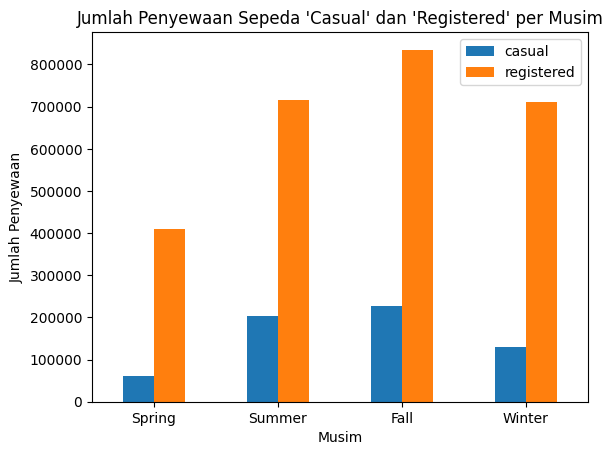

In [23]:
#Membuat diagram batang untuk total ketagori 'casual' dan 'registered'
sewa_permusim[['season', 'casual', 'registered']].plot(x='season', kind='bar', stacked=False)
plt.title('Jumlah Penyewaan Sepeda \'Casual\' dan \'Registered\' per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.legend(['casual','registered'])
plt.show()

Pada diagram batang diatas dapat terlihat bahwa musim gugur memiliki penyewaan yang terbanyak pada kategori kasual dan terdaftar (registered).  Sedangkan musim semi memiliki penyewaan paling sedikit pada kedua kategori.

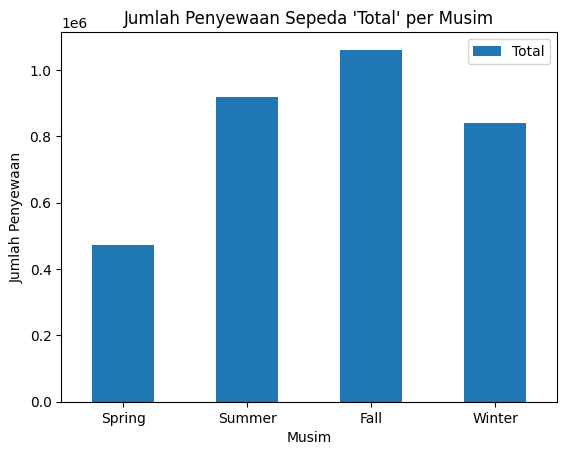

In [24]:
#Membuat diagram batang untuk total penyewaan sepeda
sewa_permusim[['season', 'cnt']].plot(x='season', kind='bar', stacked=False)
plt.title('Jumlah Penyewaan Sepeda \'Total\' per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.legend(['Total'])
plt.show()

Pada diagram batang diatas dapat terlihat bahwa musim gugur memiliki total penyewaan yang terbanyak. Sedangkan musim semi memiliki total penyewaan paling sedikit.

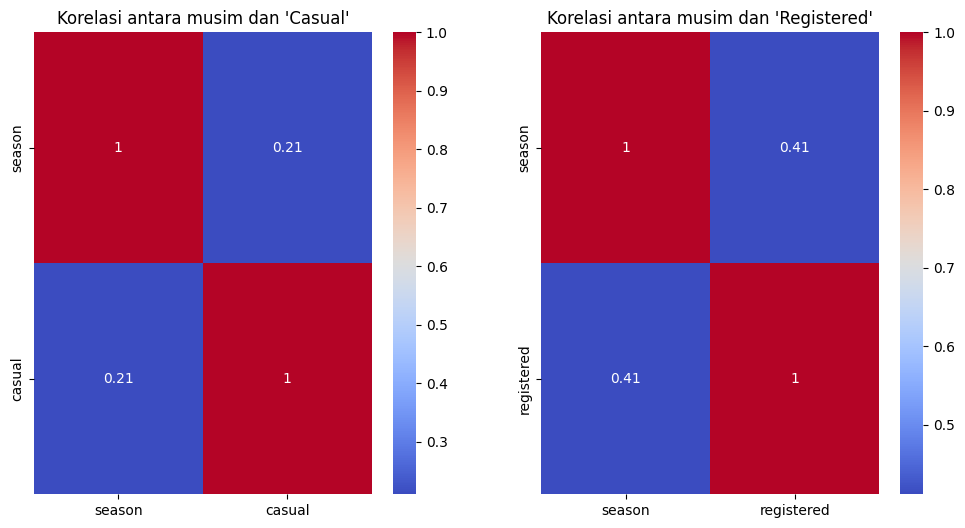

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#Korelasi musim dan kategori 'casual'
correlation1 = day_df[['season', 'casual']].corr()
sns.heatmap(correlation1, annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title('Korelasi antara musim dan \'Casual\'')

#Korelasi musim dan kategori 'registered'
correlation2 = day_df[['season', 'registered']].corr()
sns.heatmap(correlation2, annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title('Korelasi antara musim dan \'Registered\'')
plt.show()

Pada grafik diatas, dapat dilihat bahwa tidak ada korelasi yang kuat antara musim dan tiap kategori penyewaan.

##Perbedaan tingkat penyewaan sepeda pada hari kerja dan hari libur

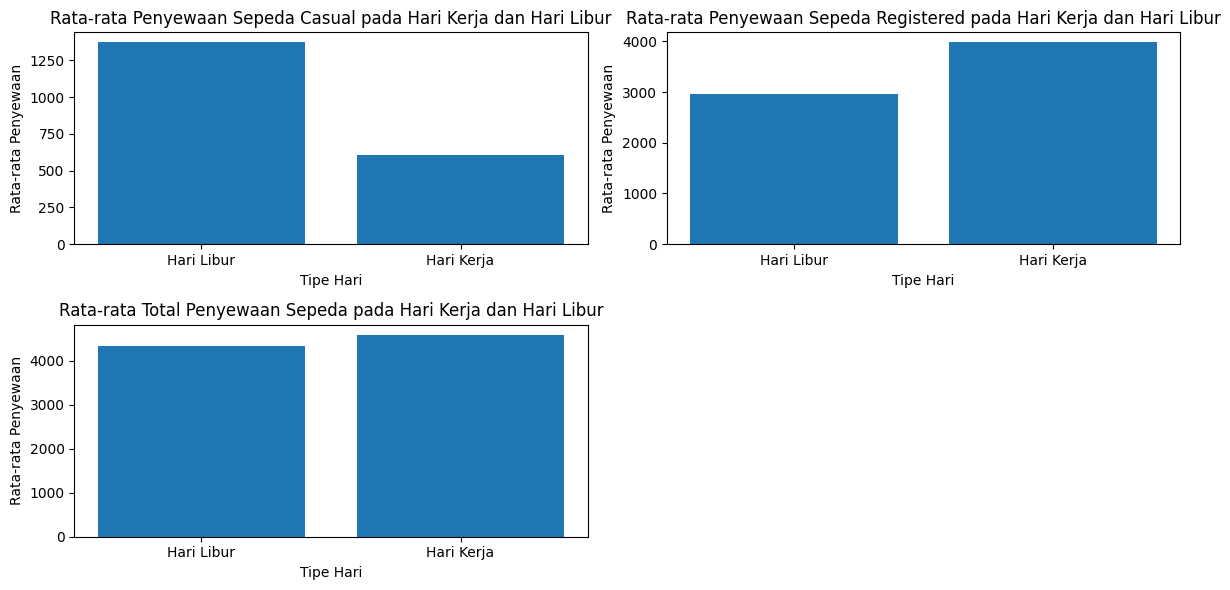

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

#Membuat diagram batang perbedaan hari libur dan hari kerja pada kategori 'casual'
axs[0, 0].bar(['Hari Libur', 'Hari Kerja'], casual_workingday['casual'])
axs[0, 0].set_title('Rata-rata Penyewaan Sepeda Casual pada Hari Kerja dan Hari Libur')
axs[0, 0].set_xlabel('Tipe Hari')
axs[0, 0].set_ylabel('Rata-rata Penyewaan')

#Membuat diagram batang perbedaan hari libur dan hari kerja pada kategori 'registered'
axs[0, 1].bar(['Hari Libur', 'Hari Kerja'], registered_workingday['registered'])
axs[0, 1].set_title('Rata-rata Penyewaan Sepeda Registered pada Hari Kerja dan Hari Libur')
axs[0, 1].set_xlabel('Tipe Hari')
axs[0, 1].set_ylabel('Rata-rata Penyewaan')

#Membuat diagram batang perbedaan hari libur dan hari kerja
axs[1, 0].bar(['Hari Libur', 'Hari Kerja'], total_workingday['cnt'])
axs[1, 0].set_title('Rata-rata Total Penyewaan Sepeda pada Hari Kerja dan Hari Libur')
axs[1, 0].set_xlabel('Tipe Hari')
axs[1, 0].set_ylabel('Rata-rata Penyewaan')

fig.delaxes(axs[1, 1])
plt.tight_layout()
plt.show()

Pada grafik di atas, kategori kasual memiliki jumlah rata-rata penyewaan lebih banyak di hari libur, sedangkan kategori terdaftar (registered) sebaliknya. Rata-rata total penyewaan sepeda lebih banyak pada hari kerja.

##Jam penyewaan sepeda paling tinggi

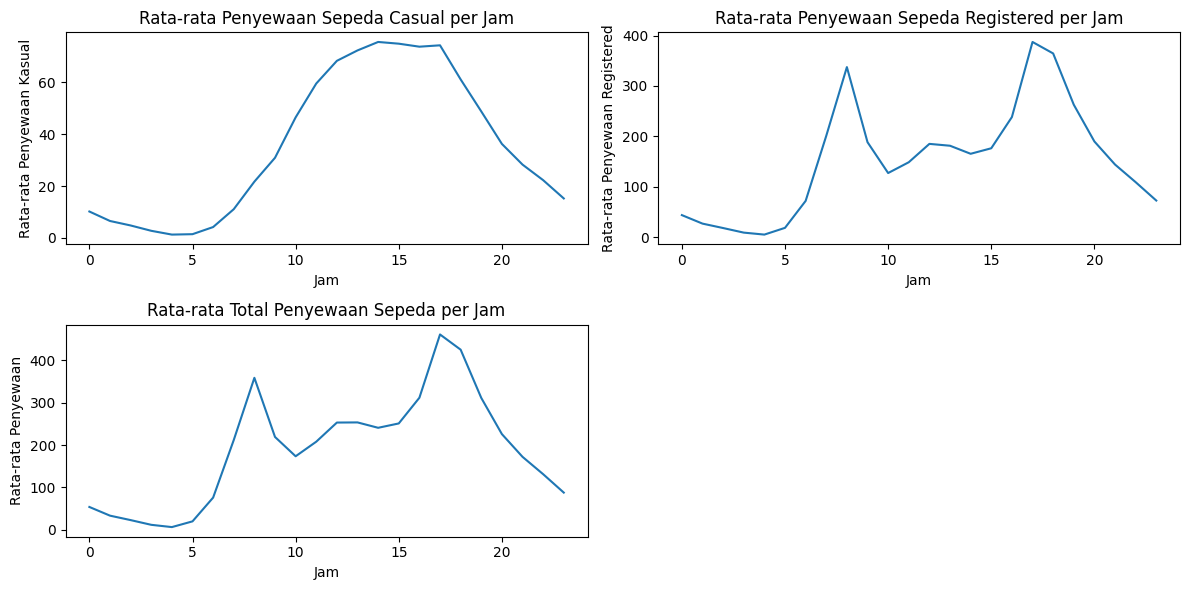

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

#Membuat diagram garis untuk kategori casual
sns.lineplot(data=bike_perhour, x='hr', y='casual', ax=axs[0, 0])
axs[0, 0].set_title('Rata-rata Penyewaan Sepeda Casual per Jam')
axs[0, 0].set_xlabel('Jam')
axs[0, 0].set_ylabel('Rata-rata Penyewaan Kasual')

##Membuat diagram garis untuk kategori registered
sns.lineplot(data=bike_perhour, x='hr', y='registered', ax=axs[0, 1])
axs[0, 1].set_title('Rata-rata Penyewaan Sepeda Registered per Jam')
axs[0, 1].set_xlabel('Jam')
axs[0, 1].set_ylabel('Rata-rata Penyewaan Registered')

#Membuat diagram garis untuk total penyewaan
sns.lineplot(data=bike_perhour, x='hr', y='cnt', ax=axs[1, 0])
axs[1, 0].set_title('Rata-rata Total Penyewaan Sepeda per Jam')
axs[1, 0].set_xlabel('Jam')
axs[1, 0].set_ylabel('Rata-rata Penyewaan')

plt.delaxes(axs[1, 1])
plt.tight_layout()
plt.show()

Pada diagram di atas, dapat dilihat bahwa rata-rata penyewaan sepeda kategori kasual banyak pada jam 12-17 dan memiliki puncak penyewaan jam 14. Pada kategori registered, rata-rata penyewaan ramai pada jam berangkat dan pulang kerja serta memiliki puncak penyewaan pada jam 17. Sedangkan secara total, penyewaan sepeda memiliki puncak rata-rata penyewaan pada jam 17.

##Pengaruh temperatur terhadap total penyewaan sepeda

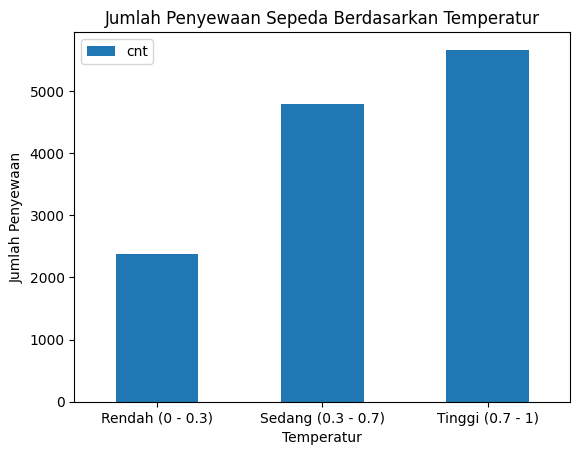

In [28]:
#Membuat digram batang untuk melihat penyewaan sepeda berdasarkan temperatur
temperatur_df[['temp_binned', 'cnt']].plot(x='temp_binned', kind='bar', stacked=False)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2], labels=['Rendah (0 - 0.3)', 'Sedang (0.3 - 0.7)', 'Tinggi (0.7 - 1)'], rotation=0)
plt.show()

Pada grafik di atas, terlihat bahwa kategori sepeda paling banyak disewa pada temperatur tinggi dan paling sedikit disewa pada temperatur rendah.